In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
codes = pd.read_csv('codes.csv', ';')
types = pd.read_csv('types.csv', ';')
#test_set = pd.read_csv('test_set.csv', ';')
train_set = pd.read_csv('train_set.csv', ';')
tr = pd.read_csv('transactions.csv', ';')

# 1. Explore datasets

Firstly lets explore transactions dataset

In [3]:
tr.info()
tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [4]:
tr.duplicated(keep = False).sum()

55

In [5]:
tr.drop_duplicates(keep = 'first', inplace = True)

then codes dataset

In [6]:
codes.info()
codes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [7]:
codes[codes['code_description'].str.contains('н/д')]

,code,code_description


In [8]:
codes.duplicated(keep = False).sum()

0

As we can see, in codes dataset 0 nan values and 0 duplicated rows. So there is nothing to clean.

In [9]:
types.info()
types.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [10]:
len(types[types['type_description'].str.contains('н/д')])

14

Now we now that there is 14 useless types, we will clean it in other part

# 2. Descriptive Statistics

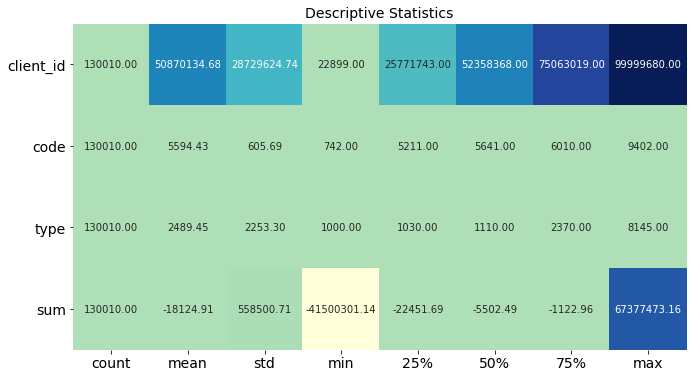

In [11]:
def describe(df):
    desc = df.describe().T
    desc_df = pd.DataFrame(index= df.columns, 
                           columns= desc.columns,
                           data=desc)
    
    fig, ax = plt.subplots(figsize=(11, desc_df.shape[0]*1.5))
    sns.heatmap(desc_df,
                annot=True,
                cmap = "YlGnBu",
                fmt= '.2f',
                ax=ax,
                cbar = False,)
    plt.xticks(size = 14)
    plt.yticks(size=14,rotation = 0)
    plt.title("Descriptive Statistics", size=14)
    
describe(tr[[col for col in tr.columns if tr[col].dtype != 'O']])

If we will look at the 'max' for column 'sum'. we see that our 'mean' and even '75%' is negative number. So we can easily identify that here we have very big outliers.

# 3. Exploring the features, visualizations

We started from merge 'code' and 'type' datasets into 'transactions'

In [12]:
df = tr.merge(codes, 'left', 'code').merge(types, 'left', 'type')
df.head()

,client_id,datetime,code,type,sum,code_description,type_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы


Then started to vizualize, but we showed only top 5, because here is a lots of value. And it will be difficult to show them all.

In [13]:
top_5 = df['code_description'].value_counts().head()

Text(0.5, 0, 'Count')

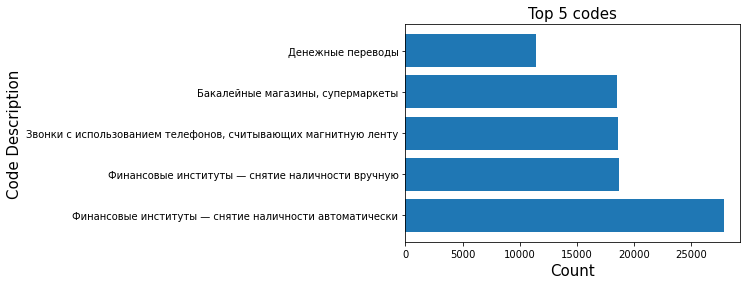

In [14]:
fig, ax = plt.subplots()

ax.barh(top_5.index, top_5)

plt.title('Top 5 codes', fontsize=15)
plt.ylabel('Code Description', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [15]:
top_5 = df['type_description'].value_counts().head()

Text(0.5, 0, 'Count')

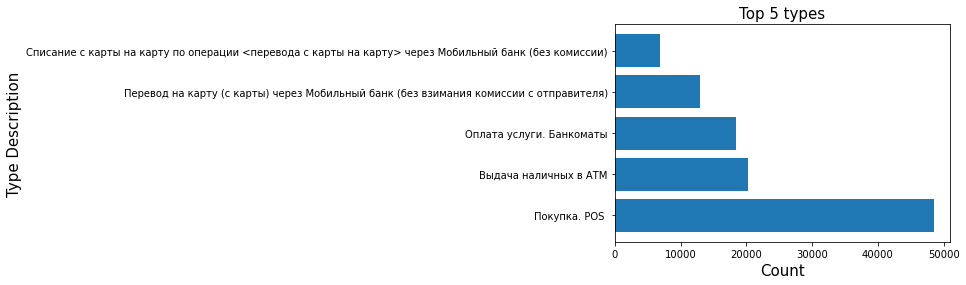

In [16]:
fig, ax = plt.subplots()

ax.barh(top_5.index, top_5)

plt.title('Top 5 types', fontsize=15)
plt.ylabel('Type Description', fontsize=15)
plt.xlabel('Count', fontsize=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x26eb964dc10>,
 'caps': [<matplotlib.lines.Line2D at 0x26eb965e310>,
 'boxes': [<matplotlib.lines.Line2D at 0x26eb964d8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x26eb965e9d0>],
 'fliers': [],
 'means': []}

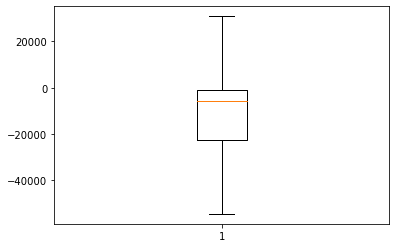

In [17]:
fig, ax = plt.subplots()
ax.boxplot(df['sum'], showfliers=False)

In [18]:
tr[tr['sum'] < -60000].shape[0], tr[tr['sum'] > 30000].shape[0]

(16942, 10988)

Using boxplot we can see that ~15% of data is low value outliers and ~10% of data is high value outliers.

# 4. Feature engineering

For the feature engineering part we decided to use RFM method. It is a customer segmentation technique that uses past transaction behavior to divide customers into groups.

RFM has 3 dimensions:

1. Recency - How recently did the customer complete a transaction?
2. Frequency - How often do they complete transactions?
3. Monetary Value - How much do they spend/receive?

In [19]:
clients_list = list(tr.client_id.unique())
client = pd.DataFrame(clients_list, columns=['client_id'])
client.head()

,client_id
0,96372458
1,24567813
2,21717441
3,14331004
4,85302434


take days to calculate dimensions of RFM method 

In [20]:
tr['day'] = tr.datetime.apply(lambda x: pd.Series(str(x).split(" ")))[0]

In [21]:
tr['time'] = tr.datetime.apply(lambda x: pd.Series(str(x).split(" ")))[1]

In [22]:
tr.day = tr.day.apply(lambda x: int(x))

to calculate 'recency' we need current day (equals to 456). Then we will substract latest transaction for each client from current day. 

In [23]:
current_day = max(tr.day)
current_day

456

In [24]:
current_day = max(tr.day)
last_tr = tr.groupby('client_id')['day'].max()
last_tr = last_tr.reset_index()
days = pd.merge(client, last_tr)
days['recency'] = current_day - days.day
client['recency'] = days['recency']
client

,client_id,recency
0,96372458,8
1,24567813,57
2,21717441,8
3,14331004,5
4,85302434,40
...,...,...
8651,91616522,5
8652,91248192,426
8653,44107368,11
8654,54180380,373


for frequency we just countnumber of transactions for each person.

In [25]:
freq = pd.DataFrame(tr.groupby('client_id')['datetime'].count()).reset_index()
frequency = pd.merge(client, freq)
client['frequency'] = frequency['datetime']
client.head()

,client_id,recency,frequency
0,96372458,8,13
1,24567813,57,14
2,21717441,8,15
3,14331004,5,23
4,85302434,40,8


for monetary value we just find sum of all transaction for each client

In [26]:
monetary = pd.DataFrame(tr.groupby('client_id')['sum'].sum()).reset_index()
monetary_values = pd.merge(client, monetary)
client['monetary_value'] = monetary_values['sum'].abs()
client.head()

,client_id,recency,frequency,monetary_value
0,96372458,8,13,1102812.03
1,24567813,57,14,488237.85
2,21717441,8,15,3135792.54
3,14331004,5,23,5893527.32
4,85302434,40,8,101501.02


Now we have three defined features that we will use to classify clients into clusters based on their indicators. 

These features hold the following meaning:
1. The smallest recency indicates the best clients since the newest transactions are better and it implies that the client is probably still using the services. The biggest recency(the oldest transactions) is the worst option indicating a possible loss of a customer.
2. The highest frequency demonstrates the best clients who complete transactions regularly. The lowest frequency shows the most inactive customers or people who have completed a couple of random transactions. The latter may also be considered as a lost customer not holding much value in a dataset.
3. The biggest absolute values from monetary_values column indicate the best clients with high financial value in a dataset(the transactions may be positive or negative numbers, that's why we use their absolute values). The smallest monetary values imply the smallest significance of clients generally in a dataset

In [27]:
print(types[types['type_description'].str.contains('н/д')])
nan_types = types[types['type_description'].str.contains('н/д')]

     type type_description
2    4035  н/д(нет данных)
15   2440              н/д
16   2360              н/д
19   1310              н/д
39   4600              н/д
54   4090              н/д
60   3810              н/д
63   4045              н/д
68   7084              н/д
84   1410              н/д
97   1510              н/д
102  8146              н/д
104  2325              н/д
135  3300              н/д


In [28]:
types.drop(types[types['type_description'].str.contains('н/д')].index, inplace=True)

# 5. Unsupervised learning

## K-means

Now we will classify clients by RFM values using K-means algorithm

In [29]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [30]:
client.set_index('client_id')
quantiles = client.quantile([0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [31]:
def RScore(x,p,d): # Recency
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d): #Frequency and Monetary value
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [32]:
client['r_quartile'] = client['recency'].apply(RScore, args=('recency',quantiles,))
client['f_quartile'] = client['frequency'].apply(FMScore, args=('frequency',quantiles,))
client['m_quartile'] = client['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
client.head()

,client_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
0,96372458,8,13,1102812.03,1,2,1
1,24567813,57,14,488237.85,3,2,2
2,21717441,8,15,3135792.54,1,2,1
3,14331004,5,23,5893527.32,1,1,1
4,85302434,40,8,101501.02,3,3,3


In [33]:
client['RFMScore'] = client.r_quartile.map(str) + client.f_quartile.map(str) + client.m_quartile.map(str)
client.head()

,client_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
0,96372458,8,13,1102812.03,1,2,1,121
1,24567813,57,14,488237.85,3,2,2,322
2,21717441,8,15,3135792.54,1,2,1,121
3,14331004,5,23,5893527.32,1,1,1,111
4,85302434,40,8,101501.02,3,3,3,333


In [34]:
print('Best Customers :', len(client[client.RFMScore == '111']))
print('Loyal Customers :', len(client[client.f_quartile == 1]))
print('Big Spenders :', len(client[client.m_quartile== 1]))
print('Almost Lost :', len(client[client.RFMScore == '134' ]))
print('Lost Customers :', len(client[client.RFMScore== '344' ]))
print('Lost Cheap Customers :', len(client[client.RFMScore == '444' ]))

Best Customers : 489
Loyal Customers : 2027
Big Spenders : 2164
Almost Lost : 120
Lost Customers : 247
Lost Cheap Customers : 640


In [35]:
import scipy.stats as stats

K-means gives the best result under the following conditions:

1) Data’s distribution is not skewed. <br>
2) Data is standardised.

In [36]:
skew = stats.skew(client['recency'])
skewtest = stats.skewtest(client['recency'])
print('Recency: \nSkew:', skew, '\nSkewtest:', skewtest)

Recency: 
Skew: 2.494724378217962 
Skewtest: SkewtestResult(statistic=57.01841127431044, pvalue=0.0)


<AxesSubplot:title={'center':'Distribution of recency'}, xlabel='recency', ylabel='Density'>

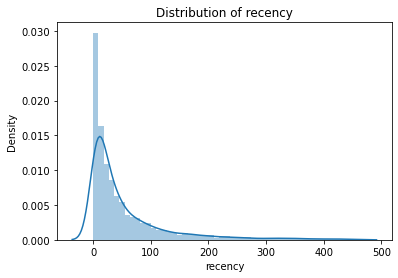

In [37]:
plt.title('Distribution of recency')
sns.distplot(client['recency'])

In [38]:
skew = stats.skew(client['frequency'])
skewtest = stats.skewtest(client['frequency'])
print('Frequency: \nSkew:', skew, '\nSkewtest:', skewtest)

Frequency: 
Skew: 52.604736459175015 
Skewtest: SkewtestResult(statistic=150.9679562846539, pvalue=0.0)


<AxesSubplot:title={'center':'Distribution of frequency'}, xlabel='frequency', ylabel='Density'>

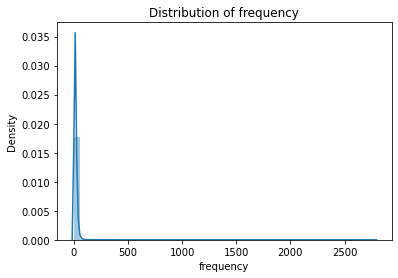

In [39]:
plt.title('Distribution of frequency')
sns.distplot(client['frequency'])

In [40]:
skew = stats.skew(client['monetary_value'])
skewtest = stats.skewtest(client['monetary_value'])
print('Monetary value: \nSkew:', skew, '\nSkewtest:', skewtest)

Monetary value: 
Skew: 54.261892973864086 
Skewtest: SkewtestResult(statistic=151.93181195776052, pvalue=0.0)


<AxesSubplot:title={'center':'Distribution of monetary value'}, xlabel='monetary_value', ylabel='Density'>

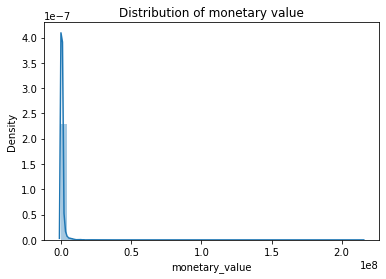

In [41]:
plt.title('Distribution of monetary value')
sns.distplot(client['monetary_value'])

We can see that our data is highly skewed, so we need perform log transformations

In [42]:
df_log = client.loc[:, 'recency':'monetary_value']
df_log = np.log(df_log+1)
df_log

,recency,frequency,monetary_value
0,2.197225,2.639057,13.913375
1,4.060443,2.708050,13.098560
2,2.197225,2.772589,14.958393
3,1.791759,3.178054,15.589365
4,3.713572,2.197225,11.527834
...,...,...,...
8651,1.791759,0.693147,10.019498
8652,6.056784,0.693147,7.717316
8653,2.484907,0.693147,6.514372
8654,5.924256,0.693147,7.082834


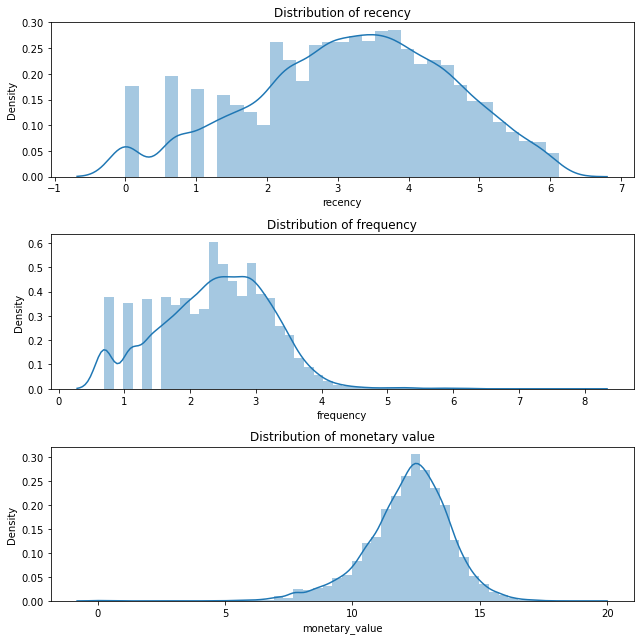

In [43]:
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('Distribution of recency')
sns.distplot(df_log['recency'])
plt.subplot(3, 1, 2)
plt.title('Distribution of frequency')
sns.distplot(df_log['frequency'])
plt.subplot(3, 1, 3)
plt.title('Distribution of monetary value')
sns.distplot(df_log['monetary_value'])
plt.tight_layout()

Now we will determine optimal K value

In [44]:
s = StandardScaler().fit(df_log)
rfm = s.transform(df_log)

In [45]:
rfm = pd.DataFrame(rfm, columns = df_log.columns)
rfm.head()

,recency,frequency,monetary_value
0,-0.712854,0.292984,1.045046
1,0.622866,0.375129,0.552052
2,-0.712854,0.451970,1.677322
3,-1.003527,0.934725,2.059084
4,0.374198,-0.233072,-0.398298


In [46]:
K = range(1, 20)
sse = [] # Sum of Squared Errors

for i in K:
    k = KMeans(n_clusters = i) 
    k.fit(rfm)
    sse.append(k.inertia_)

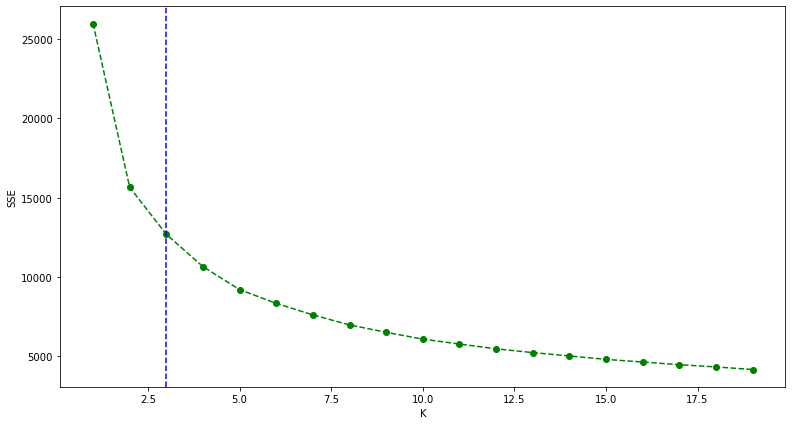

In [47]:
plt.figure(figsize=(13,7))
plt.plot(K, sse, 'go--')
plt.xlabel('K')
plt.ylabel('SSE')
plt.axvline(x = 3, color = 'blue', linestyle='--')

In [48]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(rfm)

KMeans(n_clusters=3)

In [49]:
RFM_km = pd.concat([client.loc[:, :'monetary_value'], pd.Series(kmeans.labels_)], axis=1)
RFM_km = RFM_km.set_index('client_id')
RFM_km = RFM_km.rename(columns={0: "cluster"})
RFM_km.head()

,recency,frequency,monetary_value,cluster
client_id,,,,
96372458,8,13,1102812.03,1
24567813,57,14,488237.85,0
21717441,8,15,3135792.54,1
14331004,5,23,5893527.32,1
85302434,40,8,101501.02,0


In [57]:
df = RFM_km.groupby(['cluster']).agg({'recency': 'mean','frequency': 'mean','monetary_value': ['mean', 'count']}).round(0)
df

recency frequency monetary_value      
           mean      mean           mean count
cluster                                       
0          55.0      11.0       484474.0  3632
1           8.0      27.0      1158043.0  3073
2         126.0       4.0        67967.0  1951

In [64]:
smth = RFM_km.cluster
smth = smth.reset_index()
smth.head()

,client_id,cluster
0,96372458,1
1,24567813,0
2,21717441,1
3,14331004,1
4,85302434,0


What does each cluster represent?
1) The cluster number '1' belongs to the “Best Customers” segment which we saw earlier as they purchase recently, frequent buyers, and spent the most.

2) Customers in cluster '0' are somewhere in between first and last class.

3) Cluster '2' is more related to the “Lost Cheap Customers” segment as they haven’t purchased for a long time, they have small frequency number and spent very little.

# 6. Conclusion

We worked with datasets of transactions, codes, types in order to segment the clients into several clusters. The first step was to make data preparation which consists of treatment of null and duplicate values and to do some descriptive statistics to gain a basic understanding of our data. Next, we did explanatory data analysis through visualizations of the features and created new features to use for unsupervised learning further. In the feature engineering part, the RFM principle was used. The unsupervised machine learning was k-means. K-means algorithm was implemented based on the RMF principle in order to divide the clients into general categories based on their recency, frequency, and monetary value.  As a result, we were able to segment the clients into different clusters.